In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Filepaths, numpy, and Tensorflow
import os

import numpy as np
np.random.seed(0)

In [3]:
# Load list of clouds in order
cwd_path = os.getcwd()
images_path = os.path.join(cwd_path, '/content/drive/My Drive/ML_project/image_dataset/dataset')

# List the clouds in the dataset folder: 10 Clouds
list_clouds = [name for name in os.listdir(images_path)]
#list_clouds.remove('.DS_Store')
list_clouds.sort()
list_clouds

['altocumulus',
 'altostratus',
 'cirrocumulus',
 'cirrostratus',
 'cirrus',
 'cumulonimbus',
 'cumulus',
 'nimbostratus',
 'stratocumulus',
 'stratus',
 'unknown']

In [0]:
# Load numpy saved XY_train dataset
cwd_path = os.getcwd()
outfile_path = os.path.join(cwd_path, '/content/drive/My Drive/ML_project/XY_train')

# Initialize numpy clouds data with all zeros
X = np.zeros((1,224,224,3))
y = np.zeros((1,1))

# Merge all cloud datasets in X, y
for cloud in list_clouds:
    temp_X = np.load(os.path.join(outfile_path, f"{cloud}_X.npy"))
    temp_y = np.load(os.path.join(outfile_path, f"{cloud}_y.npy"))
    X = np.append(X, temp_X, axis=0)
    y = np.append(y, temp_y, axis=0)
    

In [5]:
# Peek at X, y shapes
print(X.shape)
print(y.shape)

(3066, 224, 224, 3)
(3066, 1)


In [0]:
# split 80% train and 20% test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [7]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

# from keras.applications.resnext import ResNeXt50

model = ResNet50(include_top=True, weights=None, input_tensor=None, input_shape=(224,224,3), pooling=None, classes=11)

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [0]:
model.compile(optimizer='adam', 
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [11]:
model.fit(
    X_train,
    y_train_categorical,
    epochs=45,
    shuffle=True,
    verbose=2
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/45
 - 49s - loss: 2.3228 - acc: 0.2997
Epoch 2/45
 - 31s - loss: 1.8957 - acc: 0.3654
Epoch 3/45
 - 31s - loss: 1.7287 - acc: 0.4063
Epoch 4/45
 - 30s - loss: 1.6938 - acc: 0.4298
Epoch 5/45
 - 30s - loss: 1.5758 - acc: 0.4663
Epoch 6/45
 - 31s - loss: 1.5510 - acc: 0.4589
Epoch 7/45
 - 30s - loss: 1.4538 - acc: 0.4863
Epoch 8/45
 - 30s - loss: 1.3770 - acc: 0.4998
Epoch 9/45
 - 30s - loss: 1.4303 - acc: 0.5085
Epoch 10/45
 - 31s - loss: 1.5831 - acc: 0.4693
Epoch 11/45
 - 30s - loss: 1.5380 - acc: 0.4924
Epoch 12/45
 - 30s - loss: 1.4595 - acc: 0.4985
Epoch 13/45
 - 30s - loss: 1.3368 - acc: 0.5272
Epoch 14/45
 - 30s - loss: 1.2597 - acc: 0.5542
Epoch 15/45
 - 30s - loss: 1.1309 - acc: 0.5916
Epoch 16/45
 - 30s - loss: 1.0998 - acc: 0.6003
Epoch 17/45
 - 30s - loss: 1.0223 - acc: 0.6203
Epoch 18/45
 - 30s - loss: 0.9990 - acc: 0.6307
Epoch 19/45
 - 31s - loss: 0.9860 - acc: 0.6459
Epoch 20/45
 - 30s - loss: 0.8653 - acc: 0.6886
E

In [0]:
model.save("/content/drive/My Drive/ML_project/resNet_trained.h5")

In [13]:
# Test predictions
 encoded_predictions = model.predict(X_test)
# # np.array(x_test[0],ndmin=2)
encoded_predictions.shape


(767, 11)

In [14]:
import tensorflow as tf

encoded_predictions
sess = tf.InteractiveSession()
indexes = tf.argmax(encoded_predictions, axis=1)
indexes.eval()

array([ 4,  0,  5,  0,  6,  5,  0,  0,  0,  0,  1,  2,  4,  7,  4,  1,  1,
        2,  7, 10,  5,  3,  5,  5,  8,  1,  2, 10,  0,  1,  6,  6, 10,  6,
        0,  9,  7, 10,  2,  7, 10, 10,  0,  2, 10,  0,  1,  5,  0, 10,  4,
        0,  2,  5,  5,  7,  0, 10, 10,  4,  4,  6, 10,  6,  3,  5,  3,  3,
        8,  6,  1, 10,  4,  0,  7,  0, 10,  5,  0,  0,  5,  7, 10, 10,  3,
        5,  6,  4,  3,  5,  7,  0, 10,  3,  4,  4,  7,  5,  4,  8, 10,  6,
        7,  9, 10,  8,  5,  3,  0,  0,  5,  1, 10, 10,  5,  2,  5,  0,  4,
        7,  0,  0,  5,  5,  3,  5,  5,  7,  8,  4,  0,  9,  6,  4, 10,  1,
        8,  3,  6,  1,  3, 10,  1,  3,  6,  1, 10,  2,  1,  8, 10,  5,  7,
        0, 10,  7,  1,  4, 10, 10,  9,  4,  7,  6,  8,  1, 10,  8,  6,  0,
        5,  1,  1, 10,  3,  3,  0,  5,  1,  5, 10, 10,  4,  7,  8,  7,  8,
       10, 10,  1,  1,  5,  6,  1,  4,  1,  1,  2,  4,  3,  3,  3,  4,  0,
        8,  0,  7, 10, 10,  8,  7, 10,  4,  1,  5, 10,  3,  1, 10,  1,  5,
       10,  0,  8,  8,  6

In [15]:
sess = tf.InteractiveSession()
indexes = tf.argmax(encoded_predictions, axis=1)
prayers = indexes.eval()
prediction_labels = label_encoder.inverse_transform(prayers)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [16]:
print(f"Predicted classes: {prediction_labels[:5]}")
print(f"Actual Labels: {list(encoded_y_test[:5])}")

Predicted classes: [4. 0. 5. 0. 6.]
Actual Labels: [2, 0, 5, 0, 6]


In [30]:
tf.global_variables_initializer()


<tf.Operation 'init_2' type=NoOp>

In [31]:
# Evaluating the loaded model
model_loss, model_accuracy = model.evaluate(X_test, y_test_categorical, verbose=2)
   
print(f"InceptionResNetV2 - Loss: {model_loss}, Accuracy: {model_accuracy}")


InceptionResNetV2 - Loss: 13.566863760021862, Accuracy: 0.14602346801851065


In [43]:
ix_img = 5
img = X_test[ix_img].reshape(1,224,224,3)

# Test image
predict = np.argmax(model.predict(img))

print("actual target: ", list_clouds[encoded_y_train[ix_img]])
print("predict target: ", list_clouds[predict])

actual target:  altocumulus
predict target:  unknown


In [44]:
model.predict(img)

array([[2.5483915e-01, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.3723599e-23, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 7.4516082e-01]], dtype=float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


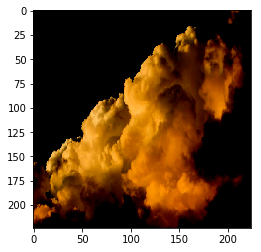

In [45]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

imgplot = plt.imshow(X_test[ix_img])